In [64]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from openvino.runtime import Core

In [65]:
ie = Core()

In [66]:

model = ie.read_model(model="model/FP32/emotions-recognition-retail-0003.xml",
                      weights="model/FP32/emotions-recognition-retail-0003.bin")    
compiled_model = ie.compile_model(model=model, device_name="CPU")

In [73]:
next(iter(compiled_model.inputs)).shape

<Shape: {1, 3, 64, 64}>

In [59]:

input_layer_ir = next(iter(compiled_model.inputs))

In [60]:
input_layer_ir

<ConstOutput: names[data] shape{1,3,64,64} type: f32>

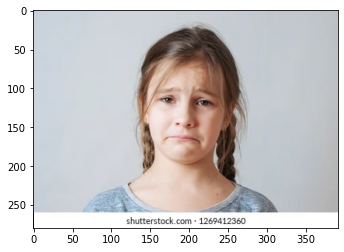

In [61]:
image = cv2.imread("data/sad1.webp")

N, C, H, W = input_layer_ir.shape

resized_image = cv2.resize(image, (W, H))
input_image = np.expand_dims(resized_image.transpose(2, 0, 1), 0)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));

In [62]:
request = compiled_model.create_infer_request()
output = request.infer({input_layer_ir.any_name: input_image})
np.argmax(request.get_output_tensor().data)

0

In [63]:
request.get_output_tensor().data

array([[[[0.35574093]],

        [[0.3078166 ]],

        [[0.186711  ]],

        [[0.11733755]],

        [[0.03239397]]]], dtype=float32)

In [80]:
import cv2
import numpy as np
from openvino.runtime import Core


class EmotionRecognizer:
    '''
    TODO: add DocString
    '''

    def __init__(self, device:str="CPU", model_xml:str="model/FP32/emotions-recognition-retail-0003.xml",
                 weights_bin: str="model/FP32/emotions-recognition-retail-0003.bin", verbose: bool = False):
        self.verbose = verbose

        # Initialize the Inference Engine and loadin the Model and Weights
        ie = Core()
        self.model = ie.read_model(model=model_xml,
                                   weights=weights_bin)
        self.model = ie.compile_model(model=self.model, device_name=device)

        # Getting the input layer information
        self.input_layer = next(iter(self.model.inputs))

        # Inference Mode
        self.model = self.model.create_infer_request()

    def predict(self, imgfile: str) -> int:
        input_shape = self.input_layer.shape
        img = self.preprocess(imgfile, input_shape)
        output = self.model.infer({self.input_layer.any_name: img})
        if self.verbose:
            print(output)
        return np.argmax(self.model.get_output_tensor().data)

    @staticmethod
    def preprocess(imgfile: str, input_shape: any):
        image = cv2.imread(imgfile)
        _, C, H, W = input_shape
        image = cv2.resize(image, (W, H))
        image = np.expand_dims(image.transpose(2, 0, 1), 0)
        return image


In [83]:
sample_img = "data/angry0.jpg"
emotion_recognizer = EmotionRecognizer()
output = emotion_recognizer.predict(sample_img)
labels = ["Neutral", "Happy", "Sad", "Surprise", "Anger"]
print("Emotion:", labels[output])

Emotion: Surprise
